In [1]:
from datetime import datetime
import fnmatch
import os
import re
import threading

import librosa
import scipy
import numpy as np
import tensorflow as tf
import random as rn

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def find_audios(num_files):
    pattern='*.wav'
    files = []
    for root, dirnames, filenames in os.walk('corpus_notes/'):
        for filename in fnmatch.filter(filenames, pattern):
            files.append(os.path.join(root, filename))
    
    print len(files)
    rn.shuffle(files,rn.random)
    
    return files[:num_files]

In [3]:
def find_models():
    pattern = '*.ckpt*'
    models = []
    
    for root, dirnames, filenames in os.walk('logdir_notes/train/2017-01-09T19-41-13'):
        for filename in fnmatch.filter(filenames, pattern):
            if filename[-5:] != '.meta':
                models.append(os.path.join(root, filename))
    return models

In [4]:
def find_generation(_dir_folder):
    pattern='*.wav'
    files = []
    for root, dirnames, filenames in os.walk(_dir_folder):
        for filename in fnmatch.filter(filenames, pattern):
            files.append(os.path.join(root, filename))
    
    print len(files)
    rn.shuffle(files,rn.random)
    return files

In [14]:
import scipy.io.wavfile as wav

def load_generic_audio(filename, sample_rate):
    (rate,audio) = wav.read(filename)
    return audio

In [15]:
generations = []
dir_folder='./'
files = find_generation (dir_folder)
# sorted(files)

for _file in files:
    generations.append(load_generic_audio(_file, 16000))
    print _file

11
./generated_0iter--40000_2017-01-13T10-08-23.wav
./generated_0iter--20000_2017-01-13T10-25-01.wav
./generated_0iter-ckpt-0_2017-01-13T09-46-29.wav
./generated_0iter-100000_2017-01-13T10-14-00.wav
./generated_0iter--70000_2017-01-13T09-51-51.wav
./generated_0iter--50000_2017-01-13T09-57-26.wav
./generated_0iter--90000_2017-01-13T10-30-23.wav
./generated_0iter--80000_2017-01-13T10-35-58.wav
./generated_0iter--10000_2017-01-13T10-41-23.wav
./generated_0iter--30000_2017-01-13T10-02-48.wav
./generated_0iter--60000_2017-01-13T10-19-27.wav


In [16]:
files = ['./generated_0iter-ckpt-0_2017-01-13T09-46-29.wav',
'./generated_0iter--10000_2017-01-13T10-41-23.wav',
'./generated_0iter--20000_2017-01-13T10-25-01.wav',
'./generated_0iter--30000_2017-01-13T10-02-48.wav',
'./generated_0iter--40000_2017-01-13T10-08-23.wav',
'./generated_0iter--50000_2017-01-13T09-57-26.wav',
'./generated_0iter--60000_2017-01-13T10-19-27.wav',
'./generated_0iter--70000_2017-01-13T09-51-51.wav',
'./generated_0iter--80000_2017-01-13T10-35-58.wav',
'./generated_0iter--90000_2017-01-13T10-30-23.wav',
'./generated_0iter-100000_2017-01-13T10-14-00.wav'
]
_seed = generations[0][:1000]

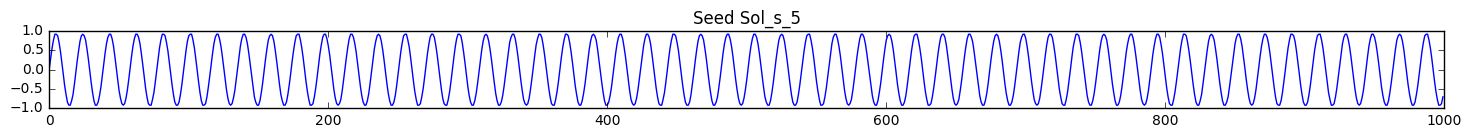

In [22]:
fig, ax = plt.subplots(figsize=(18,1))
plt.plot(_seed)
plt.title("Seed Sol_s_5")
plt.show()

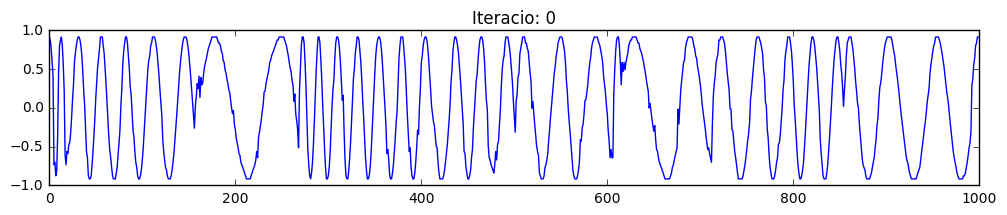

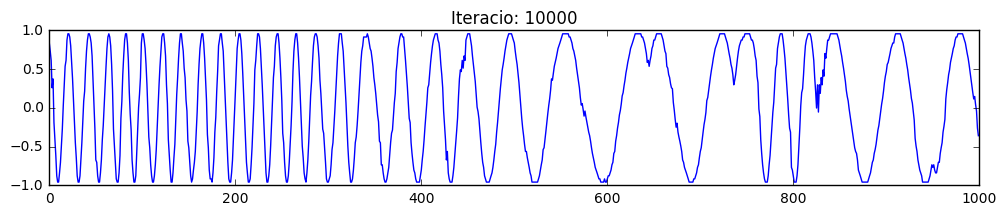

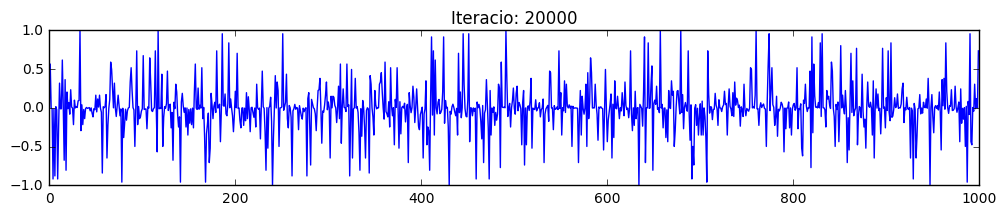

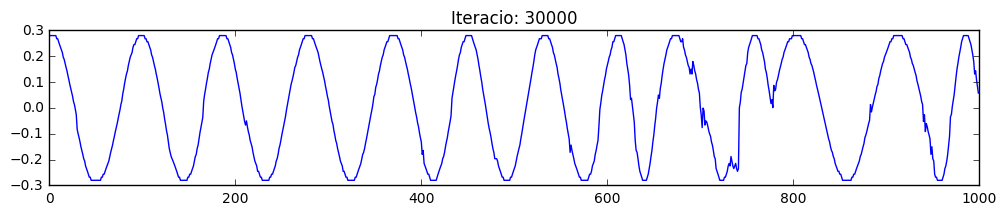

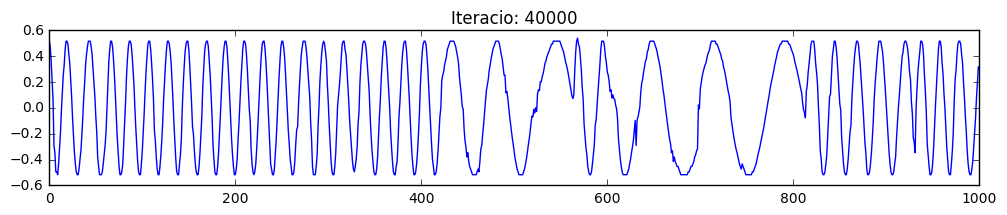

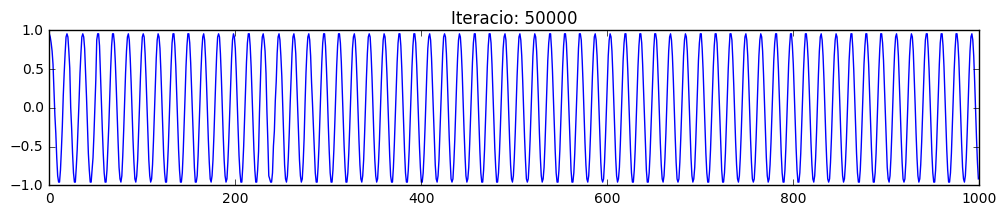

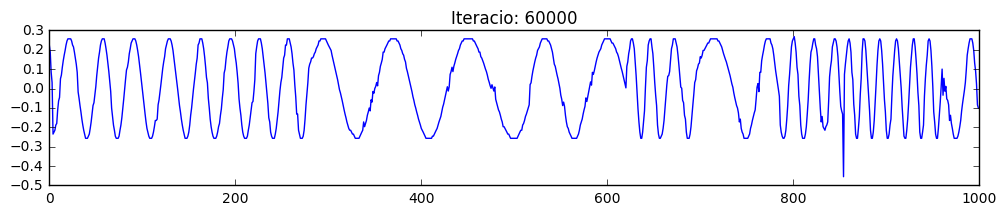

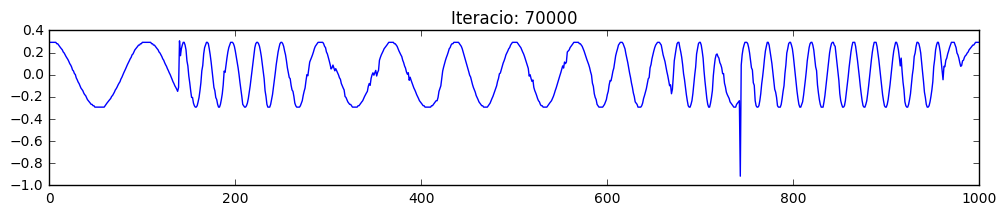

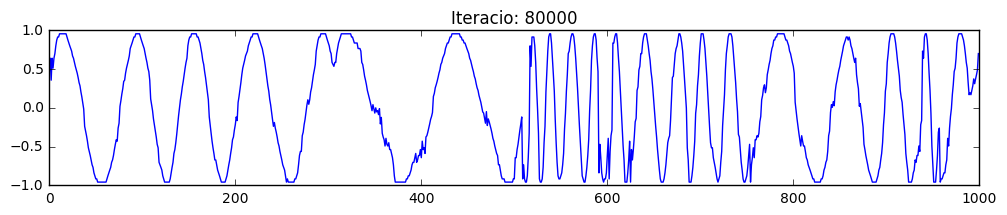

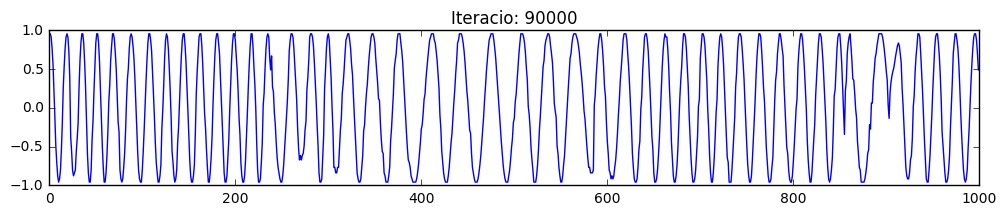

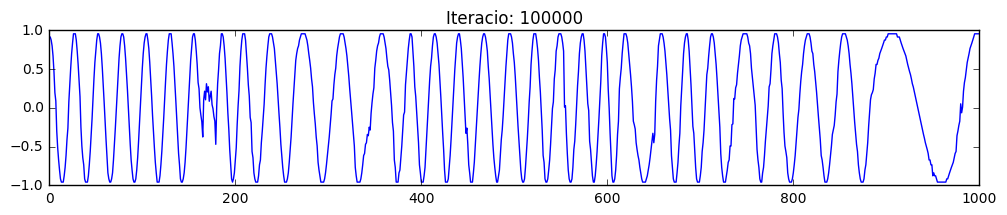

In [39]:
duration = 48000./16000.
rate = 16000
time = np.linspace(0,duration, num=rate*duration)

cont = 1
for _gen in generations:
    fig, ax = plt.subplots(figsize=(12,2))
    plt.plot( _gen[8000:9000])
    iteracio = (cont-1)*10000
    plt.title('Iteracio: '+ str(iteracio))
    cont+=1
    plt.show()